# Leonardo da Vinci project

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
import emoji
import string
import transformers
from prettytable import PrettyTable
from datetime import datetime
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords

In [2]:
# Importing dataset
my_df = pd.read_csv("twitter_data.csv")

# Data Cleaning

In [3]:
# Checking data information
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23560 entries, 0 to 23559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   link          23560 non-null  object 
 1   text          23560 non-null  object 
 2   user_name     23560 non-null  object 
 3   profile_id    23560 non-null  object 
 4   date          23560 non-null  object 
 5   no_comments   23560 non-null  int64  
 6   no_retweets   23560 non-null  int64  
 7   no_quotes     23560 non-null  int64  
 8   no_likes      23560 non-null  int64  
 9   account_name  23560 non-null  object 
 10  followers     23560 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.0+ MB


In [4]:
# Checking for sum of na values
my_df.isna().sum()

link            0
text            0
user_name       0
profile_id      0
date            0
no_comments     0
no_retweets     0
no_quotes       0
no_likes        0
account_name    0
followers       0
dtype: int64

In [5]:
# Checking for null values
my_df.isnull().all()

link            False
text            False
user_name       False
profile_id      False
date            False
no_comments     False
no_retweets     False
no_quotes       False
no_likes        False
account_name    False
followers       False
dtype: bool

In [6]:
#Checking for Duplicate values
my_df.duplicated().sum()

0

In [7]:
# Droping rows with 0 followers count 
my_df = my_df[my_df['followers'] != 0]

In [8]:
# Dropping rows with na values and duplicates
my_df = my_df.dropna()
my_df = my_df.drop_duplicates()
# Reset index
my_df = my_df.reset_index(drop=True)

In [9]:
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,followers
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,1189265.0
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,1189265.0
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,1189265.0
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,1189265.0
4,https://twitter.com/youtubemusic/status/178539...,can’t focus on anything but #RightPlaceWrongPe...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:00 PM UTC",263,4661,146,9801,youtubemusic,1189265.0


In [10]:
len(my_df)

23560

# Exploratory Data Analysis for Uncovering Data Insights

## Utility Function to calculate User Engagement

In [11]:
# Function to get user engagement
def user_engagement(row):
    return row.sum()

# Column names
col_names = ['no_comments', 'no_retweets', 'no_quotes', 'no_likes']

In [12]:
# Using Apply function creating a new column 'user_enganement'
my_df['user_engagement'] = my_df[col_names].apply(user_engagement, axis=1)
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,followers,user_engagement
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,1189265.0,1746
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,1189265.0,823
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,1189265.0,55
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,1189265.0,66
4,https://twitter.com/youtubemusic/status/178539...,can’t focus on anything but #RightPlaceWrongPe...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:00 PM UTC",263,4661,146,9801,youtubemusic,1189265.0,14871


### Checking for outliers

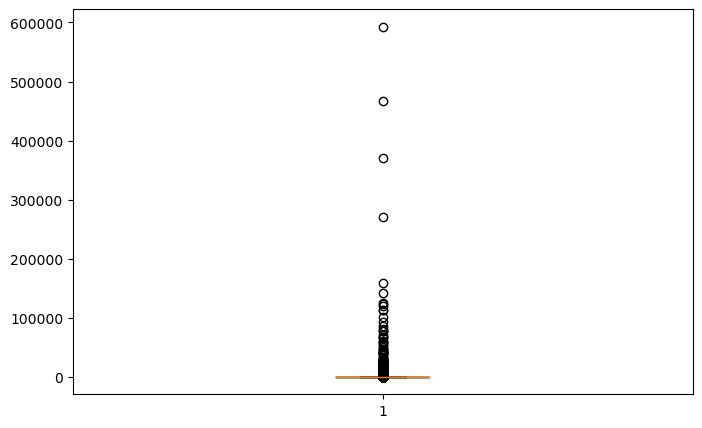

In [13]:
#Plotting box plot to check for outliers
fig = plt.figure(figsize =(8, 5))
plt.boxplot(my_df['user_engagement'])
plt.show()

In [14]:
avg_eng_with_outliers = round(my_df['user_engagement'].mean())
print("Minimum User Engagement of complete data : ", min(my_df['user_engagement']))
print("Maximum User Engagement of complete data : ", max(my_df['user_engagement']))
print("Average User Engagement of complete data : ", avg_eng_with_outliers)

Minimum User Engagement of complete data :  0
Maximum User Engagement of complete data :  592731
Average User Engagement of complete data :  388


### Removing Outliers

In [15]:
print("Total tweets : ",len(my_df))
print("Tweets with user engagement more than 2000 : ",len(my_df[my_df['user_engagement']>=2000]))

Total tweets :  23560
Tweets with user engagement more than 2000 :  482


In [16]:
# Removing outliers
my_df=my_df[my_df['user_engagement']<2000]
# Reset index
my_df = my_df.reset_index(drop=True)

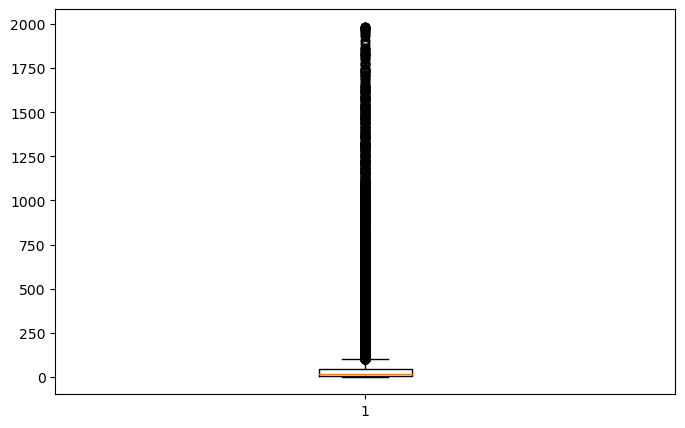

In [17]:
#Plotting box plot to check for outliers
fig = plt.figure(figsize =(8, 5))
plt.boxplot(my_df['user_engagement'])
plt.show()

In [18]:
avg_eng_without_outliers = round(my_df['user_engagement'].mean())
print("Minimum User Engagement after removing outliers : ", min(my_df['user_engagement']))
print("Maximum User Engagement after removing outliers : ", max(my_df['user_engagement']))
print("Average User Engagement after removing outliers : ", avg_eng_without_outliers)

Minimum User Engagement after removing outliers :  0
Maximum User Engagement after removing outliers :  1985
Average User Engagement after removing outliers :  78


In [19]:
print("Average User Engagement with complete data : ", avg_eng_with_outliers )
print("Average User Engagement with outliers removed : ", avg_eng_without_outliers)

Average User Engagement with complete data :  388
Average User Engagement with outliers removed :  78


In [20]:
def prettyTable():
    table = PrettyTable()
    table.field_names = ['Data', 'Avg Engagement']
    table.add_row(['Complete data', avg_eng_with_outliers])
    table.add_row(['Data with outliers removed', avg_eng_without_outliers])
    return table
print(prettyTable())

+----------------------------+----------------+
|            Data            | Avg Engagement |
+----------------------------+----------------+
|       Complete data        |      388       |
| Data with outliers removed |       78       |
+----------------------------+----------------+


### Normalizing User Engagement

In [21]:
# Columns to normalize
cols_to_normalize = ['no_comments', 'no_retweets', 'no_quotes', 'no_likes']
norm_df = pd.DataFrame()
# Normalizing the columns
for col in cols_to_normalize:
    new_column_ = f'{col}_norm'
    norm_df[new_column_] = my_df[col] / my_df['followers']

In [22]:
# Column names
col_names_norm = ['no_comments_norm', 'no_retweets_norm', 'no_quotes_norm', 'no_likes_norm']

# Using Apply function creating a new column 'user_enganement_norm'
my_df['user_engagement_norm'] = norm_df[col_names_norm].apply(user_engagement, axis=1)
my_df[['no_comments_norm', 'no_retweets_norm', 'no_quotes_norm', 'no_likes_norm']]= norm_df[['no_comments_norm', 'no_retweets_norm', 'no_quotes_norm', 'no_likes_norm']]
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,followers,user_engagement,user_engagement_norm,no_comments_norm,no_retweets_norm,no_quotes_norm,no_likes_norm
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,1189265.0,1746,0.001468,1.345369e-05,0.000399,5.045133e-06,0.001051
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,1189265.0,823,0.000692,2.455298e-04,0.000070,4.540620e-05,0.000331
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,1189265.0,55,0.000046,4.204277e-06,0.000006,0.000000e+00,0.000036
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,1189265.0,66,0.000055,8.408555e-07,0.000008,0.000000e+00,0.000047
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,1189265.0,87,0.000073,3.363422e-06,0.000011,8.408555e-07,0.000058


## Tweet Length

In [25]:
# Using a lambda function to count the number of words in each tweet
my_df['tweet_length'] = my_df['text'].apply(lambda x: len(x.split()))
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,followers,user_engagement,user_engagement_norm,no_comments_norm,no_retweets_norm,no_quotes_norm,no_likes_norm,tweet_length
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,1189265.0,1746,0.001468,1.345369e-05,0.000399,5.045133e-06,0.001051,7
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,1189265.0,823,0.000692,2.455298e-04,0.000070,4.540620e-05,0.000331,15
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,1189265.0,55,0.000046,4.204277e-06,0.000006,0.000000e+00,0.000036,13
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,1189265.0,66,0.000055,8.408555e-07,0.000008,0.000000e+00,0.000047,2
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,1189265.0,87,0.000073,3.363422e-06,0.000011,8.408555e-07,0.000058,12


In [26]:
np.std(my_df['tweet_length'])

13.289159126839134

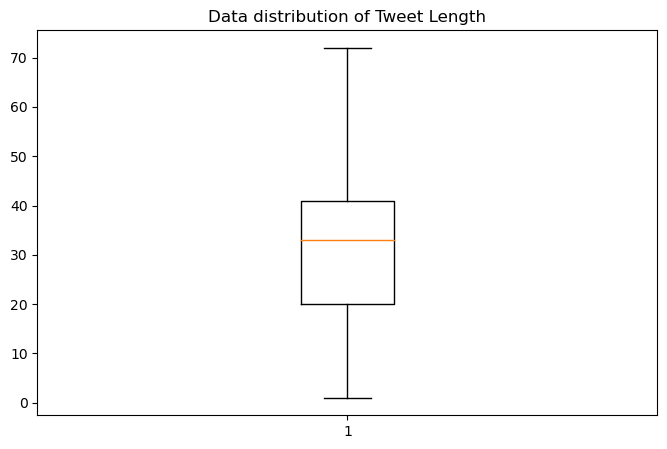

In [24]:
#Plotting box plot to check for outliers
fig = plt.figure(figsize =(8, 5))
plt.boxplot(my_df['tweet_length'])
plt.title('Data distribution of Tweet Length')
plt.show()

In [25]:
avg_length = round(my_df['tweet_length'].mean())
df1_ = my_df[my_df['tweet_length'] < avg_length]
df2_ = my_df[my_df['tweet_length'] >= avg_length]
len(df1_)

9430

In [26]:
len(df2_)

13648

In [27]:
avg_length

30

In [28]:
from prettytable import PrettyTable
def prettyTable(df, avg_length):
    table = PrettyTable()
    table.field_names = ['Tweet Length', 'Value']
    table.add_row(['Miniumun', min(df['tweet_length'])])
    table.add_row(['Maximum', max(df['tweet_length'])])
    table.add_row(['Average', avg_length])
    return table

print(prettyTable(my_df, avg_length))

+--------------+-------+
| Tweet Length | Value |
+--------------+-------+
|   Miniumun   |   1   |
|   Maximum    |   72  |
|   Average    |   30  |
+--------------+-------+


In [29]:
# Average engagement of tweets with less than avg_length and greater than avg_length
avg_eng_less_avg_length_ = round(df1_['user_engagement_norm'].mean(),5)
avg_eng_greater_avg_length_ = round(df2_['user_engagement_norm'].mean(),5)
print("Avg engagement with length of tweets less than average length - ",avg_eng_less_avg_length_ ,
      "\nAvg engagement with length of tweets greater than average length - ",avg_eng_greater_avg_length_)

Avg engagement with length of tweets less than average length -  0.00218 
Avg engagement with length of tweets greater than average length -  0.00329


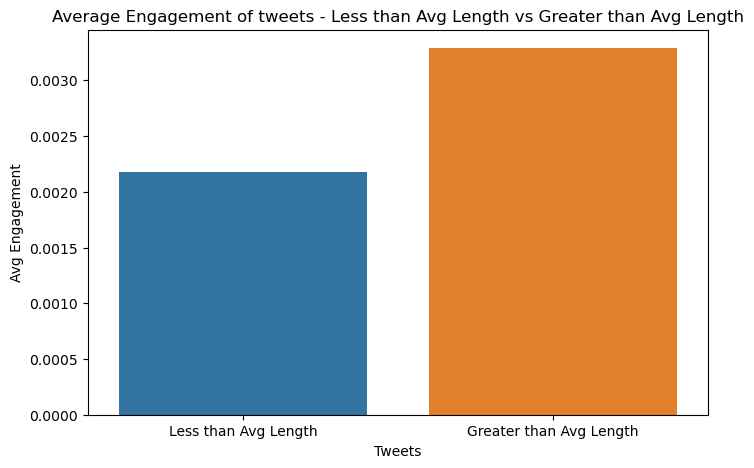

In [30]:
# Plotting the graph
categories = ['Less than Avg Length', 'Greater than Avg Length']
values = [avg_eng_less_avg_length_, avg_eng_greater_avg_length_]

# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= categories, y = values)
plt.xlabel('Tweets')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of tweets - Less than Avg Length vs Greater than Avg Length')
plt.show()

### Correlation

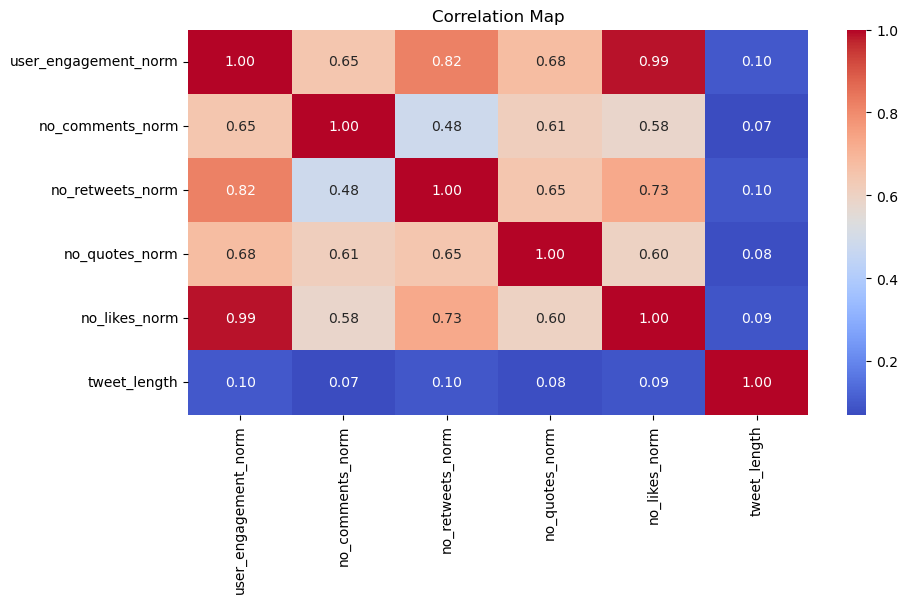

In [31]:
# Correlation plot
df_corr = my_df[['user_engagement_norm', 'no_comments_norm', 'no_retweets_norm', 'no_quotes_norm', 'no_likes_norm', 'tweet_length']]
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

## Analysis on Mentions

### Extracting Mentions

In [32]:
# Function to extract the mentions
def extract_mentions(data):
    mentions = []
    for i in data:
        mention = re.findall(r"@(\w+)", i)
        mentions.append(mention)
    return mentions

# Apply the above function on the dataframe
mentions_ = extract_mentions(my_df['text'])

# Dataframe of hashtags
mention_ = pd.DataFrame([' , '.join(sublist) if sublist else 'none' for sublist in mentions_], columns=['mentions'])
mention_

,mentions
0,none
1,none
2,lynlapid
3,none
4,chancetherapper
...,...
23073,"bacontheplay , summerhallery , edfringe"
23074,"kathrynjoseph_ , Summerhallery"
23075,Summerhallery
23076,none


In [33]:
# Function to count the number of mentions in each row
def mentions_count(row):
    if row == 'none':
        return 0
    return len(row.split(' , '))

# Apply the above function on the dataframe
mention_['no_of_mentions'] = mention_['mentions'].apply(lambda x: mentions_count(x))
mention_

,mentions,no_of_mentions
0,none,0
1,none,0
2,lynlapid,1
3,none,0
4,chancetherapper,1
...,...,...
23073,"bacontheplay , summerhallery , edfringe",3
23074,"kathrynjoseph_ , Summerhallery",2
23075,Summerhallery,1
23076,none,0


In [34]:
# Joining the mentions and tweets dataframes
my_df['mentions'] = mention_['mentions']
my_df['no_of_mentions'] = mention_['no_of_mentions'] 
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,followers,user_engagement,user_engagement_norm,no_comments_norm,no_retweets_norm,no_quotes_norm,no_likes_norm,tweet_length,mentions,no_of_mentions
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,1189265.0,1746,0.001468,1.345369e-05,0.000399,5.045133e-06,0.001051,7,none,0
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,1189265.0,823,0.000692,2.455298e-04,0.000070,4.540620e-05,0.000331,15,none,0
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,1189265.0,55,0.000046,4.204277e-06,0.000006,0.000000e+00,0.000036,13,lynlapid,1
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,1189265.0,66,0.000055,8.408555e-07,0.000008,0.000000e+00,0.000047,2,none,0
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,1189265.0,87,0.000073,3.363422e-06,0.000011,8.408555e-07,0.000058,12,chancetherapper,1


### Avg Engagement of Tweets - with mentions vs without mentions

In [35]:
# Dataframe of tweets with mentions
with_mentions_df_ = my_df[my_df['mentions'] != 'none']
with_mentions_df_.shape

(11748, 20)

In [36]:
# Dataframe of tweets without mentions
without_mentions_df_ = my_df[my_df['mentions'] == 'none']
without_mentions_df_.shape

(11330, 20)

In [37]:
# Average engagement of tweets with mentions and without mentions
avg_eng_with_mentions_ = round(with_mentions_df_['user_engagement_norm'].mean(),5)
avg_eng_without_mentions_ = round(without_mentions_df_['user_engagement_norm'].mean(),5)
print("Avg engagement with mentions - ",avg_eng_with_mentions_ ,
      "\nAvg engagement without mentions - ",avg_eng_without_mentions_)

Avg engagement with mentions -  0.00263 
Avg engagement without mentions -  0.00305


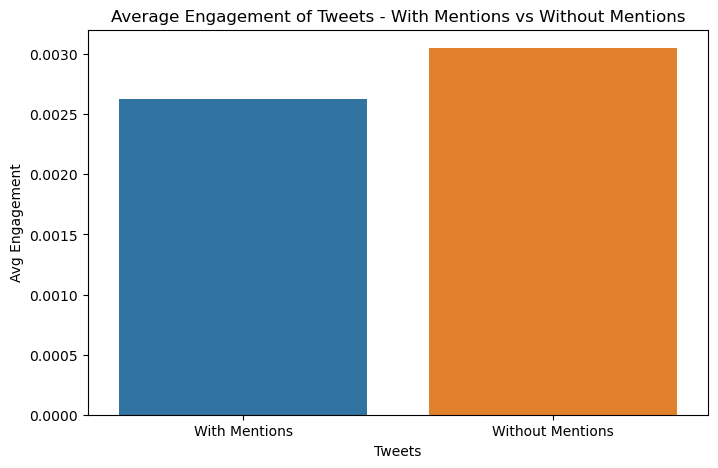

In [38]:
# Plotting the graph
categories = ['With Mentions', 'Without Mentions']
values = [avg_eng_with_mentions_, avg_eng_without_mentions_]

# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= categories, y = values)
plt.xlabel('Tweets')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets - With Mentions vs Without Mentions')
plt.show()

## Analysis on Hashtags

### Extracting Hashtags

In [39]:
# Function to extract the hashtags
def extract_hashtags(data):
    hashtags = []
    for i in data:
        htag = re.findall(r"#(\w+)", i)
        hashtags.append(htag)
    return hashtags

# Apply the above function on the dataframe
hashtags_ = extract_hashtags(my_df['text'])

# Dataframe of hashtags
hash_ = pd.DataFrame([' , '.join(sublist) if sublist else 'none' for sublist in hashtags_], columns=['hashtags'])
hash_

,hashtags
0,"GIDLE , 6YearsWithGIDLE"
1,none
2,"YouTubeMusic , APAHM"
3,none
4,none
...,...
23073,"Review , theatre , fringetheatre , edinburgh ,..."
23074,none
23075,none
23076,none


In [40]:
# Function to count the number of hashtags in each row
def hashtags_count(row):
    if row == 'none':
        return 0
    return len(row.split(' , '))

# Apply the above function on the dataframe
hash_['no_of_hashtags'] = hash_['hashtags'].apply(lambda x: hashtags_count(x))
hash_

,hashtags,no_of_hashtags
0,"GIDLE , 6YearsWithGIDLE",2
1,none,0
2,"YouTubeMusic , APAHM",2
3,none,0
4,none,0
...,...,...
23073,"Review , theatre , fringetheatre , edinburgh ,...",5
23074,none,0
23075,none,0
23076,none,0


In [41]:
# Joining the hashtags and tweets dataframes
my_df['hashtags'] = hash_['hashtags']
my_df['no_of_hashtags'] = hash_['no_of_hashtags'] 
my_df

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,...,user_engagement_norm,no_comments_norm,no_retweets_norm,no_quotes_norm,no_likes_norm,tweet_length,mentions,no_of_mentions,hashtags,no_of_hashtags
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,...,0.001468,1.345369e-05,0.000399,5.045133e-06,0.001051,7,none,0,"GIDLE , 6YearsWithGIDLE",2
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,...,0.000692,2.455298e-04,0.000070,4.540620e-05,0.000331,15,none,0,none,0
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,...,0.000046,4.204277e-06,0.000006,0.000000e+00,0.000036,13,lynlapid,1,"YouTubeMusic , APAHM",2
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,...,0.000055,8.408555e-07,0.000008,0.000000e+00,0.000047,2,none,0,none,0
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,...,0.000073,3.363422e-06,0.000011,8.408555e-07,0.000058,12,chancetherapper,1,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23073,https://twitter.com/EveryTheatre/status/169077...,"#Review: @bacontheplay @summerhallery ★★★★★ ""I...",Everything Theatre,1.23634e+18,"Aug 13, 2023 · 5:27 PM UTC",0,4,0,12,EveryTheatre,...,0.001374,0.000000e+00,0.000344,0.000000e+00,0.001031,25,"bacontheplay , summerhallery , edfringe",3,"Review , theatre , fringetheatre , edinburgh ,...",5
23074,https://twitter.com/AdmiralFallow/status/16909...,🚨 The glorious @kathrynjoseph_ is joining us t...,Admiral Fallow,1.67359e+18,"Aug 14, 2023 · 6:45 AM UTC",0,8,1,15,AdmiralFallow,...,0.002065,0.000000e+00,0.000688,8.602891e-05,0.001290,29,"kathrynjoseph_ , Summerhallery",2,none,0
23075,https://twitter.com/TheStage/status/1691047902...,★★★★ Review: Concerned Others – Shocking and v...,The Stage,5.76323e+17,"Aug 14, 2023 · 11:23 AM UTC",0,6,0,11,TheStage,...,0.000083,0.000000e+00,0.000029,0.000000e+00,0.000054,16,Summerhallery,1,none,0
23076,https://twitter.com/painesplough/status/169101...,Mark Thomas? In a play written for him by Ed E...,Paines Plough,8.37591e+17,"Aug 14, 2023 · 9:00 AM UTC",1,3,7,13,painesplough,...,0.000584,2.433801e-05,0.000073,1.703660e-04,0.000316,45,none,0,none,0


### Avg Engagement of Tweets - with hastags vs without hashtags

In [42]:
# Dataframe of tweets with hashtags
with_hashtags_df_ = my_df[my_df['hashtags'] != 'none']
with_hashtags_df_.shape

(6903, 22)

In [43]:
# Dataframe of tweets without hashtags
without_hashtags_df_ = my_df[my_df['hashtags'] == 'none']
without_hashtags_df_.shape

(16175, 22)

In [44]:
# Average engagement of tweets with hashtags and without hashtags
avg_eng_with_hashtags_ = round(with_hashtags_df_['user_engagement_norm'].mean(),5)
avg_eng_without_hashtags_ = round(without_hashtags_df_['user_engagement_norm'].mean(),5)
print("Avg engagement with hashtags - ",avg_eng_with_hashtags_ ,
      "\nAvg engagement without hashtags - ",avg_eng_without_hashtags_)

Avg engagement with hashtags -  0.00426 
Avg engagement without hashtags -  0.00223


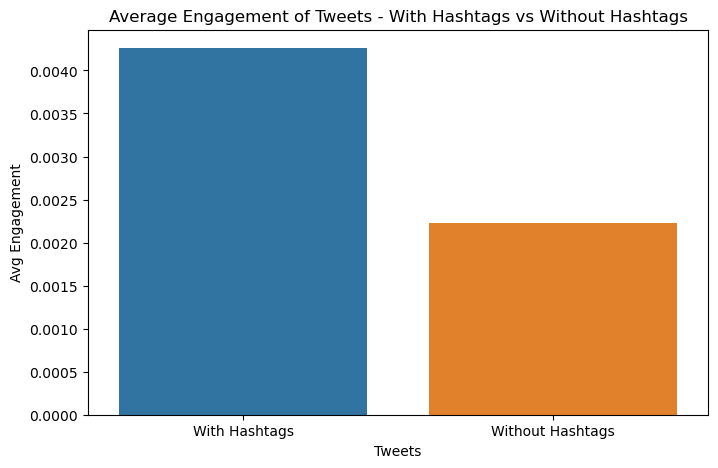

In [45]:
# Plotting the graph
categories = ['With Hashtags', 'Without Hashtags']
values = [avg_eng_with_hashtags_, avg_eng_without_hashtags_]

# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= categories, y = values)
plt.xlabel('Tweets')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets - With Hashtags vs Without Hashtags')
plt.show()

### Dataframe of Hashtags and Frequency of Hashatgs

In [46]:
# Unnesting list
hashtags_ = sum(hashtags_,[])

# Frequency of each hashtag
hashtags_dict = nltk.FreqDist(hashtags_)
hashtags_dict

FreqDist({'Glasgow': 604, 'WeAreCEC': 582, 'GFF24': 318, 'MomentsOfBeauty': 228, 'COVIDCeilidh': 126, 'MomentsofBeauty': 120, 'CCFest23': 105, 'wearecec': 98, 'ccfest2022': 86, 'coachella': 77, ...})

In [47]:
# Dataframe of hastags and their frequency
hashtags_df = pd.DataFrame({'Hashtag': list(hashtags_dict.keys()), 'Count': list(hashtags_dict.values())})
hashtags_df

,Hashtag,Count
0,GIDLE,2
1,6YearsWithGIDLE,1
2,YouTubeMusic,2
3,APAHM,1
4,ArabAmericanHeritageMonth,4
...,...,...
4003,BrightonFringeAwardforExcellence,1
4004,immersive,1
4005,LightningRidge,1
4006,edfringe2023,1


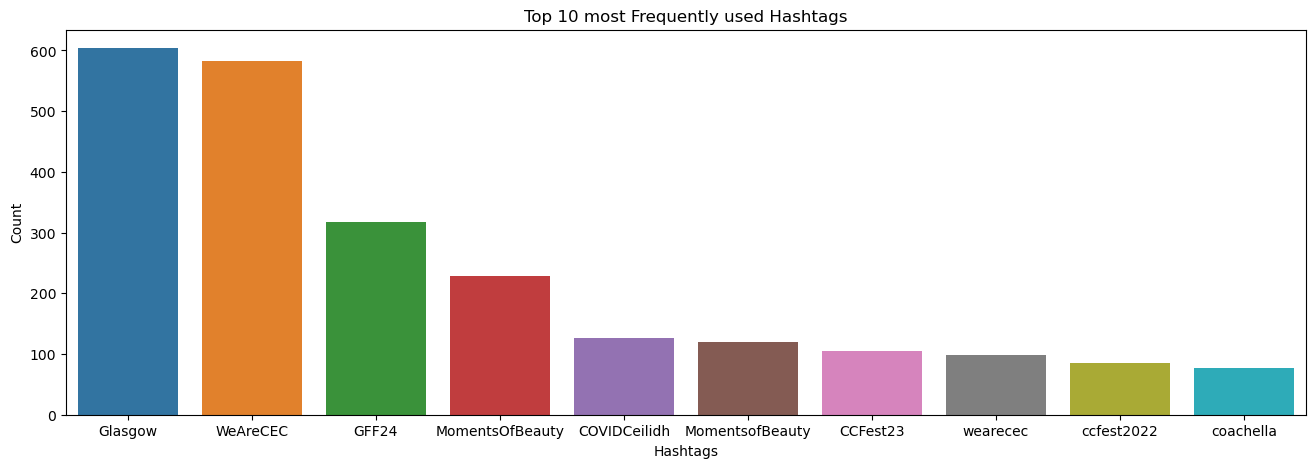

In [48]:
# Top 10 most frequently used hashtags        
top_hashtags = hashtags_df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_hashtags, x= "Hashtag", y = "Count")
ax.set(title = 'Top 10 most Frequently used Hashtags')
ax.set(xlabel = 'Hashtags')
ax.set(ylabel = 'Count')
plt.show()

In [49]:
top_hashtags

,Hashtag,Count
744,Glasgow,604
3536,WeAreCEC,582
753,GFF24,318
2758,MomentsOfBeauty,228
1632,COVIDCeilidh,126
2803,MomentsofBeauty,120
1831,CCFest23,105
3615,wearecec,98
1571,ccfest2022,86
5,coachella,77


### User Engagement of Top 10 Frequently used Hashtags

In [50]:
top_hashtags

,Hashtag,Count
744,Glasgow,604
3536,WeAreCEC,582
753,GFF24,318
2758,MomentsOfBeauty,228
1632,COVIDCeilidh,126
2803,MomentsofBeauty,120
1831,CCFest23,105
3615,wearecec,98
1571,ccfest2022,86
5,coachella,77


In [51]:
# Average engagement calculation of top 10 hashtags
top10_hashtags_ = top_hashtags['Hashtag'][0:10].tolist()
top10_avg_eng_ = []
for i in range(len(top10_hashtags_)):
    boolean_ = my_df['hashtags'].str.contains(top10_hashtags_[i])
    df_ = my_df[boolean_]
    top10_avg_eng_.append(round(df_['user_engagement_norm'].mean(),5))

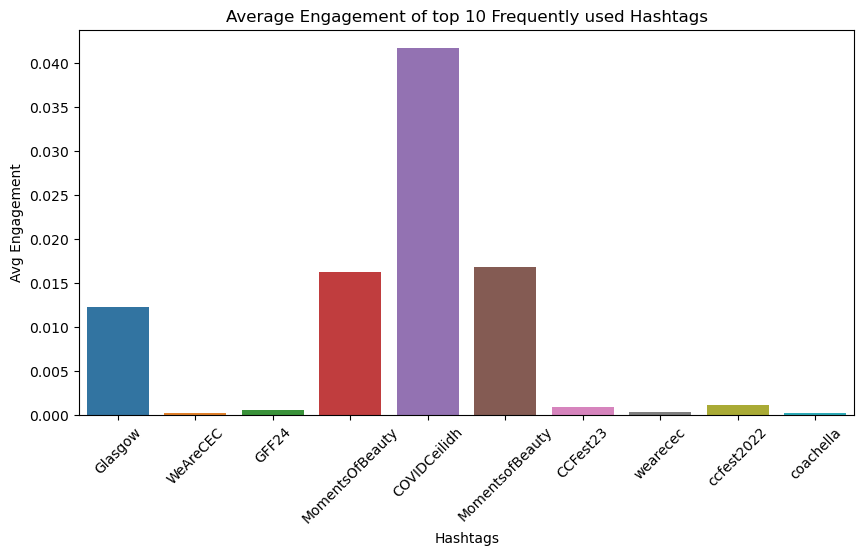

In [52]:
# Creating a bar plot to show avg engagement
plt.figure(figsize=(10,5))
ax = sns.barplot(x= top10_hashtags_, y = top10_avg_eng_)
plt.xlabel('Hashtags')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of top 10 Frequently used Hashtags')
# Rotate the x-axis values
plt.xticks(rotation=45)
plt.show()

## Analysis on Emojis

### Extracting Emojis

In [53]:
# Function to extract emojis
def extract_emojis(text):
    #return [e['emoji'] for e in emoji.emoji_list(text)]
    return [c for c in text if c in emoji.EMOJI_DATA]

# Apply the above function on the dataframe
emojis_ = my_df['text'].apply(extract_emojis).explode()

# Type
type(emojis_)

pandas.core.series.Series

In [54]:
# Convert emojis to strings explicitly
emoj_ = emojis_.astype(str)

# Group emojis by index values and join them into a single string
emoj_ = emoj_.groupby(emoj_.index).apply(','.join)

# Replace nan values with the string 'none'
emoj_ = emoj_.replace('nan', 'none')

# Convert the Series object to a DataFrame
emoj_ = pd.DataFrame(emoj_)

# Rename the column name
emoj_.columns = ['emojis']
emoj_

,emojis
0,none
1,none
2,none
3,none
4,none
...,...
23073,none
23074,"🚨,🚨"
23075,none
23076,"🏆,🎥"


### Number of Emojis in each Tweet

In [55]:
# Function to count the number of emojis in each row
def emojis_count(row):
    if row == 'none':
        return 0
    return len(row.split(','))

# Applying the above function on the dataframe
emoj_['no_of_emojis'] = emoj_['emojis'].apply(lambda x: emojis_count(x))
emoj_

,emojis,no_of_emojis
0,none,0
1,none,0
2,none,0
3,none,0
4,none,0
...,...,...
23073,none,0
23074,"🚨,🚨",2
23075,none,0
23076,"🏆,🎥",2


### Removing Duplicate Emojis in each Tweet

In [56]:
# Function to remove the emojis duplicates
def remove_repeated_emojis(emojis):
    # Split the emojis string by commas into a list
    emoji_list = emojis.split(',')
    
    # Use set to remove duplicates and then convert back to list to maintain order
    unique_emojis = list(dict.fromkeys(emoji_list))
    
    # Join the unique emojis back into a string separated by commas
    return ','.join(unique_emojis)

# Note :- A combination of dict.fromkeys() is used to remove duplicates while preserving the order of the emojis.

# Apply the above function on the dataframe
emoj_['unique_emojis'] = emoj_['emojis'].apply(remove_repeated_emojis)
emoj_

,emojis,no_of_emojis,unique_emojis
0,none,0,none
1,none,0,none
2,none,0,none
3,none,0,none
4,none,0,none
...,...,...,...
23073,none,0,none
23074,"🚨,🚨",2,🚨
23075,none,0,none
23076,"🏆,🎥",2,"🏆,🎥"


### Number of Unique Emojis in each Tweet

In [57]:
# Applying the emojis_count function on the dataframe
emoj_['no_of_unq_emojis'] = emoj_['unique_emojis'].apply(lambda x: emojis_count(x))
emoj_

,emojis,no_of_emojis,unique_emojis,no_of_unq_emojis
0,none,0,none,0
1,none,0,none,0
2,none,0,none,0
3,none,0,none,0
4,none,0,none,0
...,...,...,...,...
23073,none,0,none,0
23074,"🚨,🚨",2,🚨,1
23075,none,0,none,0
23076,"🏆,🎥",2,"🏆,🎥",2


In [58]:
# Joining the emojis and tweets dataframes
my_df['emojis'] = emoj_['emojis']
my_df['no_of_emojis'] = emoj_['no_of_emojis']
my_df['unique_emojis'] = emoj_['unique_emojis']
my_df['no_of_unq_emojis'] = emoj_['no_of_unq_emojis']
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,...,no_likes_norm,tweet_length,mentions,no_of_mentions,hashtags,no_of_hashtags,emojis,no_of_emojis,unique_emojis,no_of_unq_emojis
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,...,0.001051,7,none,0,"GIDLE , 6YearsWithGIDLE",2,none,0,none,0
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,...,0.000331,15,none,0,none,0,none,0,none,0
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,...,0.000036,13,lynlapid,1,"YouTubeMusic , APAHM",2,none,0,none,0
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,...,0.000047,2,none,0,none,0,none,0,none,0
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,...,0.000058,12,chancetherapper,1,none,0,none,0,none,0


### Avg Engagement of Tweets - with emojis vs without emojis

In [59]:
# Dataframe of tweets with emojis
with_emojis_df_ = my_df[my_df['emojis'] != 'none']
with_emojis_df_.shape

(12617, 26)

In [60]:
# Dataframe of tweets without emojis
without_emojis_df_ = my_df[my_df['emojis'] == 'none']
without_emojis_df_.shape

(10461, 26)

In [61]:
# Average engagement of tweets with emojis and without emojis
avg_eng_with_emojis_ = round(with_emojis_df_['user_engagement_norm'].mean(),5)
avg_eng_without_emojis_ = round(without_emojis_df_['user_engagement_norm'].mean(),5)
print("Avg engagement with emojis - ",avg_eng_with_emojis_ ,
      "\nAvg engagement without emojis - ",avg_eng_without_emojis_)

Avg engagement with emojis -  0.0031 
Avg engagement without emojis -  0.00252


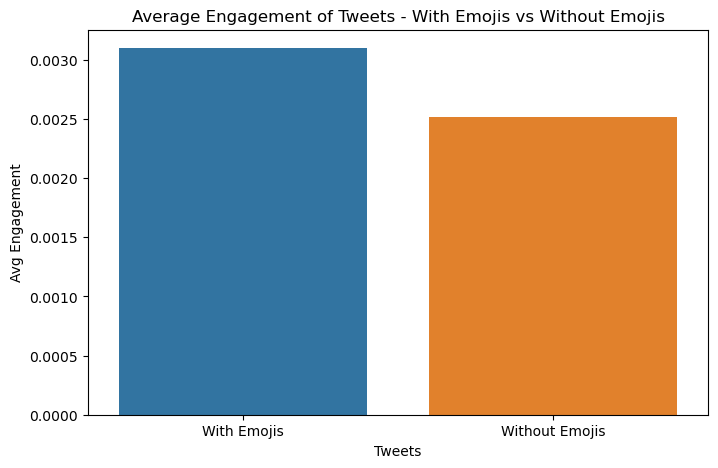

In [62]:
# Plotting the graph
categories = ['With Emojis', 'Without Emojis']
values = [avg_eng_with_emojis_, avg_eng_without_emojis_]

# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= categories, y = values)
plt.xlabel('Tweets')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets - With Emojis vs Without Emojis')
plt.show()

### Average Engagement with respect to number of Unique Emojis

In [63]:
no_of_unq_emojis_ = my_df['no_of_unq_emojis'].unique().tolist()
avg_eng_no_of_unq_emojis_ = []
for i in no_of_unq_emojis_:
    boolean_ = my_df['no_of_unq_emojis'] == i
    df_ = my_df[boolean_]
    avg_eng_no_of_unq_emojis_.append(df_['user_engagement_norm'].mean())

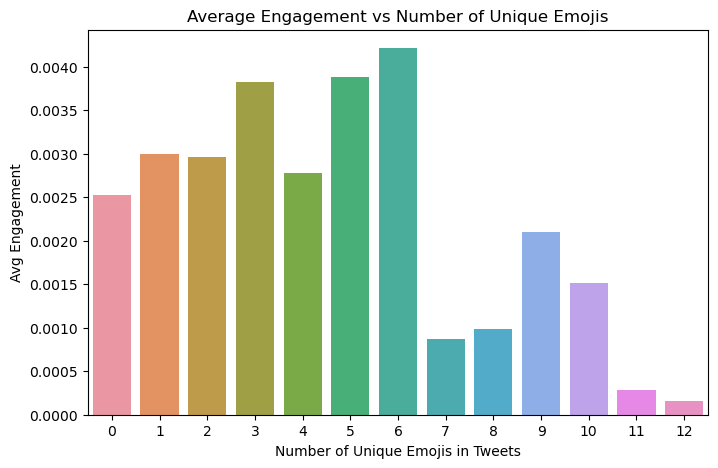

In [64]:
# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= no_of_unq_emojis_, y = avg_eng_no_of_unq_emojis_)
plt.xlabel('Number of Unique Emojis in Tweets')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement vs Number of Unique Emojis')
plt.show()

### Dataframe of Emojis and Frequency of Emojis

In [65]:
# Remove any None values that might result from empty lists
emojis_ = emojis_.dropna()

# Count the occurrences of each emoji
emoji_freq = Counter(emojis_)

In [66]:
# Emojis and its frequency stored in a dataframe

# Convert Counter to DataFrame
emoji_df = pd.DataFrame(emoji_freq.items(), columns=['emoji', 'count'])

# Display the emoji counts dictionary
print(emoji_df)

    emoji  count
0       🎶    641
1       🥲      4
2       🫡      8
3       🚨    217
4       😭     23
..    ...    ...
814     🐛      2
815     🕷      4
816     ❔      2
817     🥑      1
818     🌜      1

[819 rows x 2 columns]


C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127903 (\N{ADMISSION TICKETS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anac

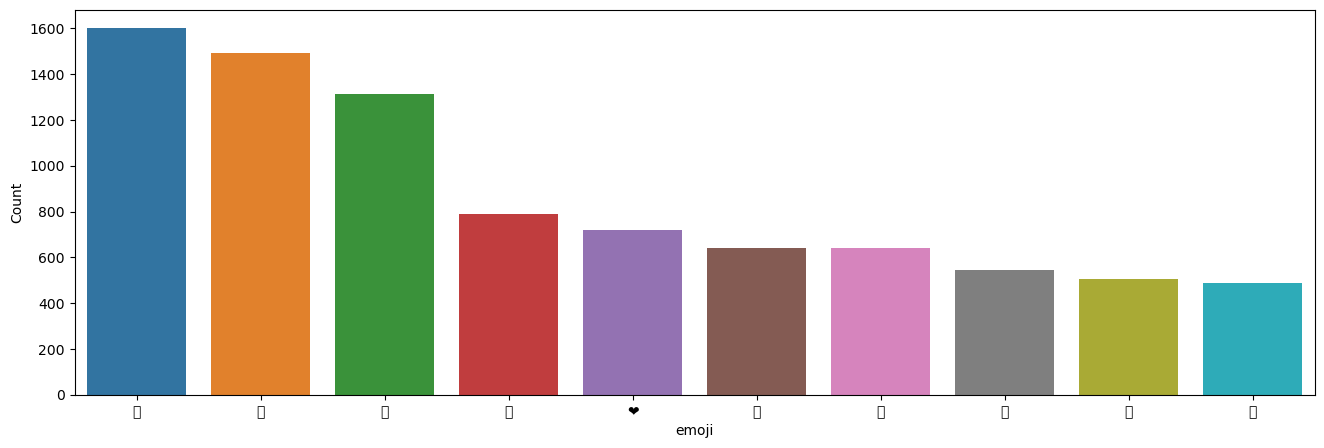

Top 10 most frequently used emojis : 

['⭐', '👇', '🎟', '✨', '❤', '🎶', '🎉', '👏', '👉', '👀']


In [67]:
# Top 10 most frequently used emojis

most_used_emojis = emoji_df.nlargest(columns="count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=most_used_emojis, x= "emoji", y = "count")
ax.set(ylabel = 'Count')
plt.show()
print("Top 10 most frequently used emojis : \n")
print(most_used_emojis['emoji'].tolist())

### User Engagement of Top 10 most Frequently used Emojis

In [68]:
print(most_used_emojis)

    emoji  count
103     ⭐   1601
166     👇   1494
309     🎟   1312
16      ✨    791
39      ❤    718
0       🎶    641
23      🎉    641
144     👏    545
76      👉    506
8       👀    486


In [69]:
top10_emojis_ = most_used_emojis['emoji'][0:10].tolist()
emojis_top10_avg_eng_ = []
for i in range(len(top10_emojis_)):
    boolean_ = my_df['unique_emojis'].str.contains(top10_emojis_[i])
    df_ = my_df[boolean_]
    emojis_top10_avg_eng_.append(round(df_['user_engagement_norm'].mean(),5))

C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127903 (\N{ADMISSION TICKETS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nagad\anac

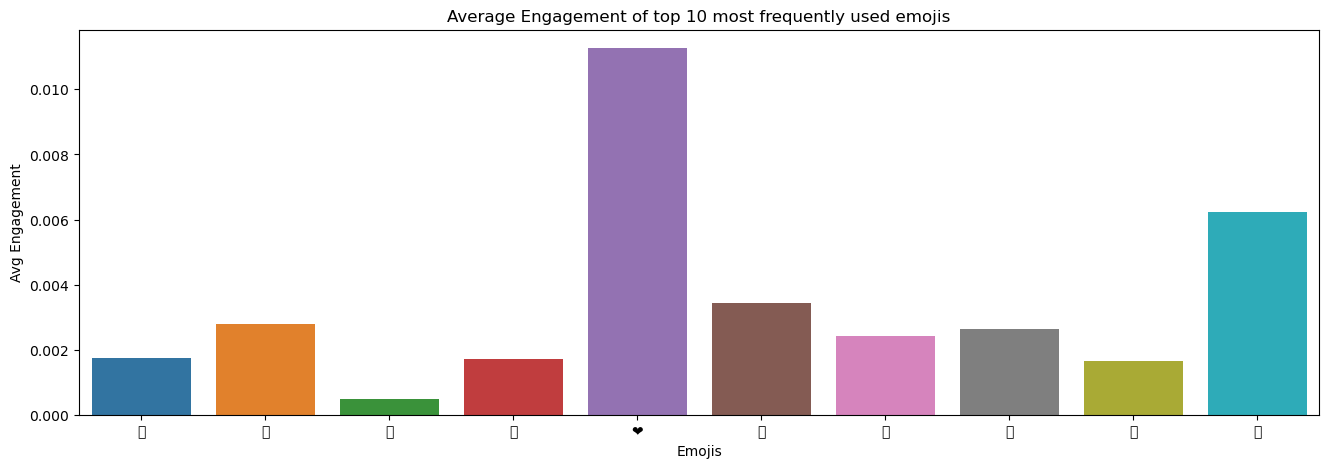

['⭐', '👇', '🎟', '✨', '❤', '🎶', '🎉', '👏', '👉', '👀']


In [70]:
# Plotting a bar plot to show avg engagement
plt.figure(figsize=(16,5))
ax = sns.barplot(x= top10_emojis_, y = emojis_top10_avg_eng_)
plt.xlabel('Emojis')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of top 10 most frequently used emojis')
plt.show()
print(top10_emojis_)
# # Set the font to a font that supports emojis
# plt.rcParams['font.family'] = 'DejaVu Sans'
# # Replace the x-axis tick labels with emojis
# plt.xticks(ticks=range(len(categories)), labels=categories)

## Analysis based on Day of Week

### Extracting day of the week

In [71]:
# Function to extract day of the week from date string
def extract_day_of_week(date_str):
    # Parse the date string to datetime object
    date_obj = datetime.strptime(date_str, "%b %d, %Y · %I:%M %p %Z")
    # Return the day of the week
    return date_obj.strftime("%A")

# Applying the above function to the 'date' column
my_df['day_of_week'] = my_df['date'].apply(extract_day_of_week)
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,...,tweet_length,mentions,no_of_mentions,hashtags,no_of_hashtags,emojis,no_of_emojis,unique_emojis,no_of_unq_emojis,day_of_week
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,...,7,none,0,"GIDLE , 6YearsWithGIDLE",2,none,0,none,0,Wednesday
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,...,15,none,0,none,0,none,0,none,0,Wednesday
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,...,13,lynlapid,1,"YouTubeMusic , APAHM",2,none,0,none,0,Wednesday
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,...,2,none,0,none,0,none,0,none,0,Tuesday
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,...,12,chancetherapper,1,none,0,none,0,none,0,Tuesday


### Weekdays vs Weekends

In [72]:
# User engagement of tweets on weekdays and weekends
days_of_week_ = my_df['day_of_week'].unique()
weekdays_=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
days_ = ['weekdays', 'weekends']
days_avg_eng_ = []
tweets_count_ = []
a=b=0
x=[]
y=[]
for i in range(len(days_of_week_)):
    boolean_ = my_df['day_of_week'].str.contains(days_of_week_[i])
    df_ = my_df[boolean_]
    if days_of_week_[i] in weekdays_:
        a+=len(df_)
        x.append(round(df_['user_engagement_norm'].mean(),5))
    else:
        b+=len(df_)
        y.append(round(df_['user_engagement_norm'].mean(),5))
days_avg_eng_.append(round(sum(x)/len(x),5))
days_avg_eng_.append(round(sum(y)/len(y),5))
tweets_count_.append(a)
tweets_count_.append(b)

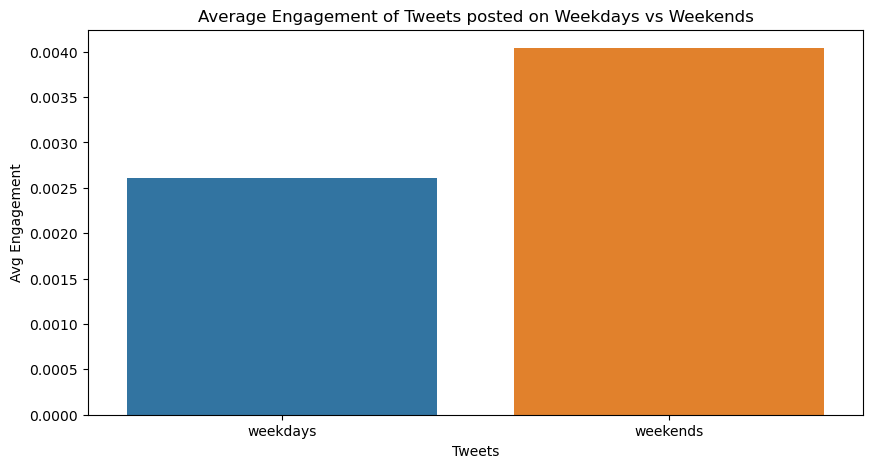

In [73]:
# Plotting a bar plot to show avg engagement on weekdays vs weekends
plt.figure(figsize=(10,5))
ax = sns.barplot(x= days_, y = days_avg_eng_)
plt.xlabel("Tweets")
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets posted on Weekdays vs Weekends')
plt.show()

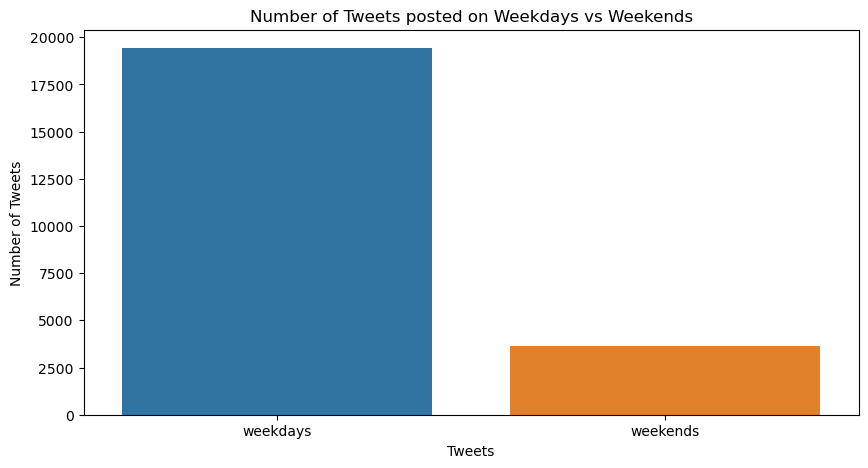

In [74]:
# Plotting a bar plot to show tweets count on Weekdays vs Weekends
plt.figure(figsize=(10,5))
ax = sns.barplot(x= days_, y = tweets_count_)
plt.xlabel('Tweets')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets posted on Weekdays vs Weekends')
plt.show()

In [75]:
print(" Avg number of Tweets on each Weekdays : ", round(tweets_count_[0]/5))
print(" Avg number of Tweets on each Weekends : ", round(tweets_count_[1]/2))

 Avg number of Tweets on each Weekdays :  3886
 Avg number of Tweets on each Weekends :  1824


### Day of Week

In [76]:
# User engagement of tweets on each day of the week
days_of_week_ = my_df['day_of_week'].unique()
day_avg_eng_ = []
day_tweets_count_ = []
for i in range(len(days_of_week_)):
    boolean_ = my_df['day_of_week'] == days_of_week_[i]
    df_ = my_df[boolean_]
    day_avg_eng_.append(round(df_['user_engagement_norm'].mean(),5))
    day_tweets_count_.append(len(df_))

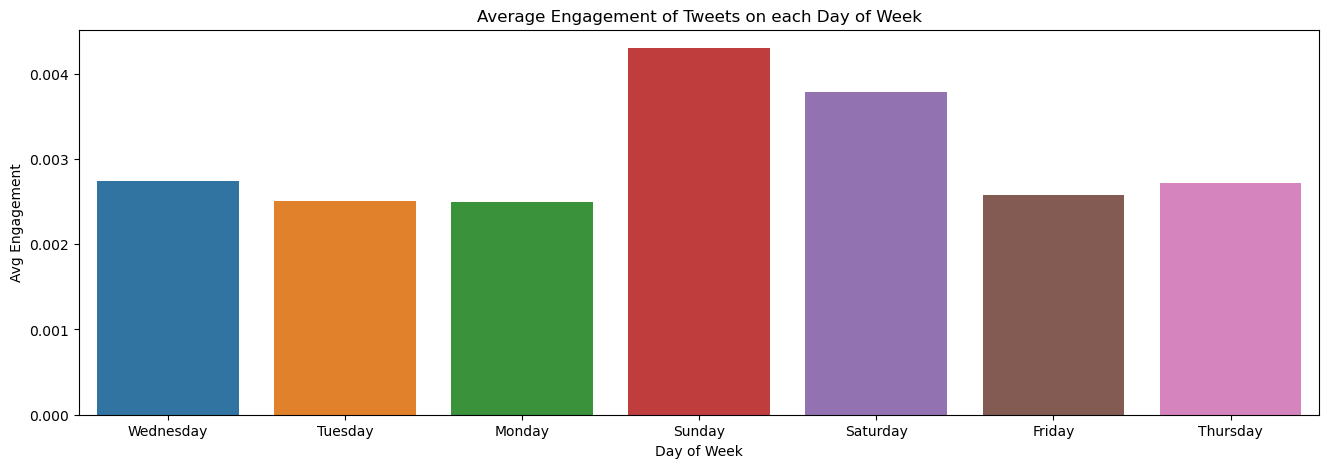

In [77]:
# Plotting a bar plot to show avg engagement based on day of the week
plt.figure(figsize=(16,5))
ax = sns.barplot(x= days_of_week_, y = day_avg_eng_)
plt.xlabel('Day of Week')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets on each Day of Week')
plt.show()

In [78]:
print("Avg engagement on Saturdays: ",day_avg_eng_[5],
      "\nAvg engagement on Sundays : ",day_avg_eng_[4])

Avg engagement on Saturdays:  0.00258 
Avg engagement on Sundays :  0.00378


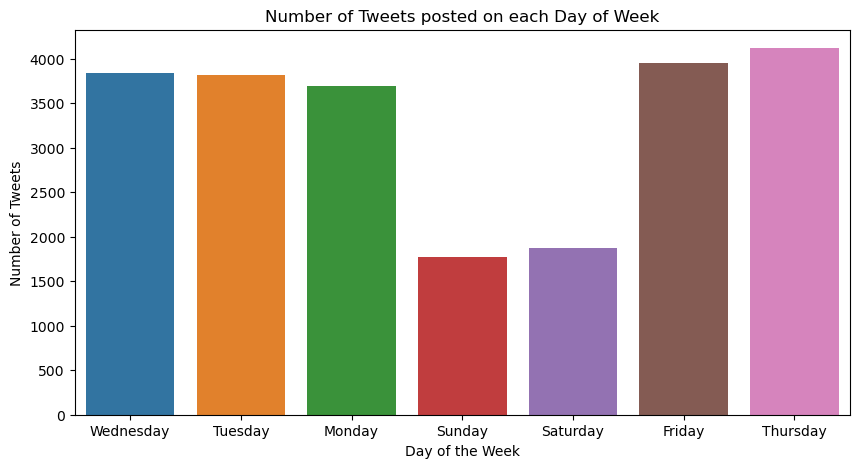

In [79]:
# Plotting a bar plot to show tweets count on each day of the week
plt.figure(figsize=(10,5))
ax = sns.barplot(x= days_of_week_, y = day_tweets_count_)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets posted on each Day of Week')
plt.show()

In [80]:
print("Number of tweets on Fridays : ", len(my_df[my_df['day_of_week'] == 'Friday']),
      "\nNumber of tweets on Wednesdays : ", len(my_df[my_df['day_of_week'] == 'Wednesday']),
      "\nNumber of tweets on Tuesdays : ", len(my_df[my_df['day_of_week'] == 'Tuesday']))

Number of tweets on Fridays :  3949 
Number of tweets on Wednesdays :  3845 
Number of tweets on Tuesdays :  3817


#### Tweets posted on Weekends - With Hashtags vs Without Hashtags

The above results shows that the average engagement of tweets posted on saturdays and sundays have higher user engagement. Here I have filtered the dataframe using day of the week i.e., tweets posted on Saturdays and Sundays to analyse the impact of using hashtags and number of tweets contains hashtags.

In [81]:
# Filtering dataframe to include tweets posted only on Saturday and Sunday
df_sat_sun_ = my_df[my_df['day_of_week'].isin(['Saturday', 'Sunday'])]

# Dataframe of tweets with hashtags
with_hashtags_df_sat_sun_ = df_sat_sun_[df_sat_sun_['hashtags'] != 'none']
# Dataframe of tweets without hashtags
without_hashtags_df_sat_sun_ = df_sat_sun_[df_sat_sun_['hashtags'] == 'none']

# Average engagement of tweets with hashtags and without hashtags
avg_eng_with_hashtags_sat_sun_ = round(with_hashtags_df_sat_sun_['user_engagement_norm'].mean(),5)
avg_eng_without_hashtags_sat_sun_ = round(without_hashtags_df_sat_sun_['user_engagement_norm'].mean(),5)
print("Avg engagement of tweets with hashtags posted on saturday and sunday - ",avg_eng_with_hashtags_sat_sun_ ,
      "\nAvg engagement of tweets without hashtags posted on saturday and sunday - ",avg_eng_without_hashtags_sat_sun_)

Avg engagement of tweets with hashtags posted on saturday and sunday -  0.00607 
Avg engagement of tweets without hashtags posted on saturday and sunday -  0.00315


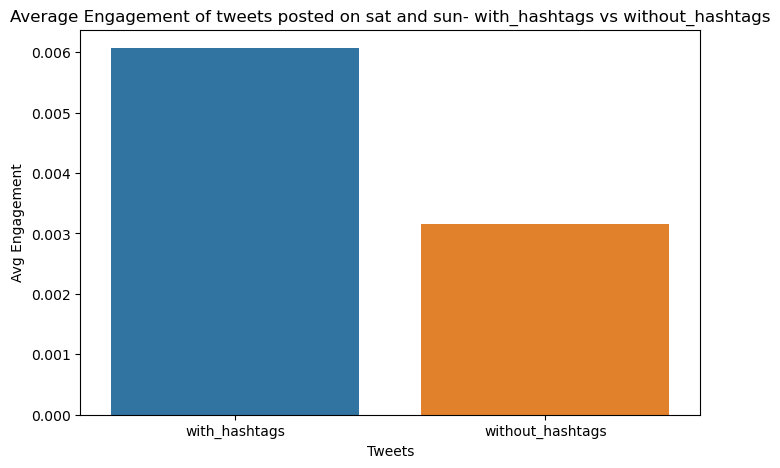

In [82]:
# Plotting the graph
categories = ['with_hashtags', 'without_hashtags']
values = [avg_eng_with_hashtags_sat_sun_, avg_eng_without_hashtags_sat_sun_]

# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= categories, y = values)
plt.xlabel('Tweets')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of tweets posted on sat and sun- with_hashtags vs without_hashtags')
plt.show()

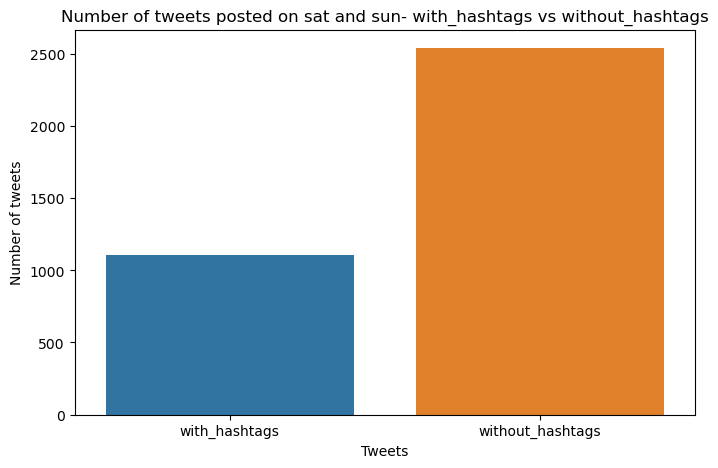

In [83]:
# Plotting the graph
categories = ['with_hashtags', 'without_hashtags']
tweets_count = [len(with_hashtags_df_sat_sun_), len(without_hashtags_df_sat_sun_)]

# Creating a bar plot to show avg engagement
plt.figure(figsize=(8,5))
ax = sns.barplot(x= categories, y = tweets_count)
plt.xlabel('Tweets')
plt.ylabel('Number of tweets')
plt.title('Number of tweets posted on sat and sun- with_hashtags vs without_hashtags')
plt.show()

## Analysis based on Time of Day

### Extracting time of the day

In [84]:
# Function to extract time of the day from date string
def extract_time_of_day(date_str):
    # Parse the date string to datetime object
    date_obj = datetime.strptime(date_str, "%b %d, %Y · %I:%M %p %Z")
    # Extract the time of day (hours and minutes)
    return date_obj.strftime("%I:%M %p")

# Apply the function to the 'date_column'
my_df['time_of_day'] = my_df['date'].apply(extract_time_of_day)

In [85]:
# Function to extract hour from time string
def extract_hour(time_str):
    # Parse the time string to a datetime object
    time_obj = datetime.strptime(time_str, "%I:%M %p")
    # Extract the hour and return it
    return time_obj.strftime("%I %p")

# Apply the function to the 'time_column'
my_df['hour'] = my_df['time_of_day'].apply(extract_hour)
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,...,no_of_mentions,hashtags,no_of_hashtags,emojis,no_of_emojis,unique_emojis,no_of_unq_emojis,day_of_week,time_of_day,hour
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,...,0,"GIDLE , 6YearsWithGIDLE",2,none,0,none,0,Wednesday,08:25 PM,08 PM
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,...,0,none,0,none,0,none,0,Wednesday,06:00 PM,06 PM
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,...,1,"YouTubeMusic , APAHM",2,none,0,none,0,Wednesday,04:32 PM,04 PM
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,...,0,none,0,none,0,none,0,Tuesday,08:58 PM,08 PM
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,...,1,none,0,none,0,none,0,Tuesday,07:20 PM,07 PM


In [86]:
# Function to convert time string to datetime object
def convert_to_datetime(time_str):
    return datetime.strptime(time_str, "%I %p")

# Convert the time list to a list of datetime objects
hour_of_day = my_df['hour'].unique().tolist()
datetime_list = [convert_to_datetime(time_str) for time_str in hour_of_day]

# Sort the list of datetime objects
sorted_datetime_list = sorted(datetime_list)

# Convert the sorted datetime objects back to strings
hour_of_day_ = [time_obj.strftime("%I %p").lstrip('0').upper() for time_obj in sorted_datetime_list]

### Active Hours vs Inactive Hours

In [87]:
hour_of_day_ = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM',
                '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']

In [88]:
# User engagement of tweets in active and inactive work hours
Active_work_hours_ = ['09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM']
hours_ = ['Active Work Hours', 'Inactive Work Hours']
hours_avg_eng_ = []
tweets_count_ = []
a=b=0
x=[]
y=[]
for i in range(len(hour_of_day_)):
    boolean_ = my_df['hour'] == hour_of_day_[i]
    df_ = my_df[boolean_]
    if hour_of_day_[i] in Active_work_hours_:
        a+=len(df_)
        x.append(round(df_['user_engagement_norm'].mean(),5))
    else:
        b+=len(df_)
        y.append(round(df_['user_engagement_norm'].mean(),5))
hours_avg_eng_.append(round(sum(x)/len(x),5))
hours_avg_eng_.append(round(sum(y)/len(y),5))
tweets_count_.append(a)
tweets_count_.append(b)

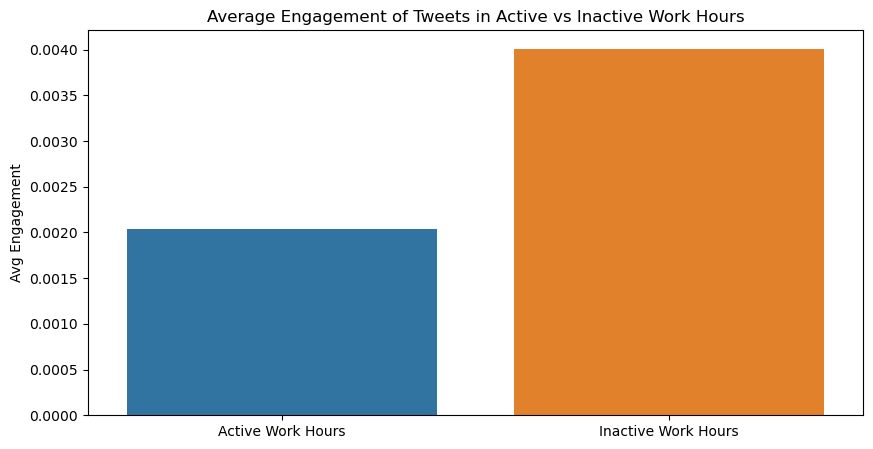

In [89]:
# Plotting a bar plot to show avg engagement in active vs inactive work hours
plt.figure(figsize=(10,5))
ax = sns.barplot(x= hours_, y = hours_avg_eng_)
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets in Active vs Inactive Work Hours')
plt.show()

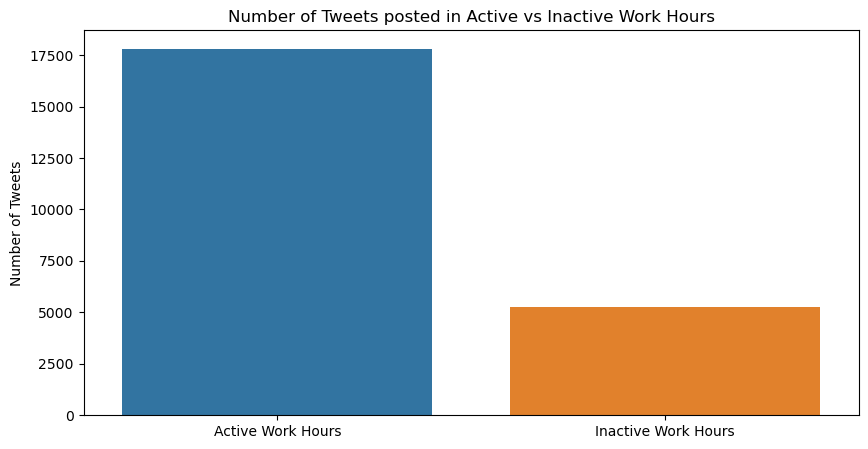

In [90]:
# Plotting a bar plot to show tweets count in active vs inactive work hours
plt.figure(figsize=(10,5))
ax = sns.barplot(x= hours_, y = tweets_count_)
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets posted in Active vs Inactive Work Hours')
plt.show()

### Hour of the Day

In [91]:
# User engagement of tweets based on time of the week
hourly_avg_eng_ = []
hourly_tweets_count_ = []
for i in range(len(hour_of_day_)):
    boolean_ = my_df['hour'] == hour_of_day_[i]
    df_ = my_df[boolean_]
    hourly_avg_eng_.append(round(df_['user_engagement_norm'].mean(),5))
    hourly_tweets_count_.append(len(df_))

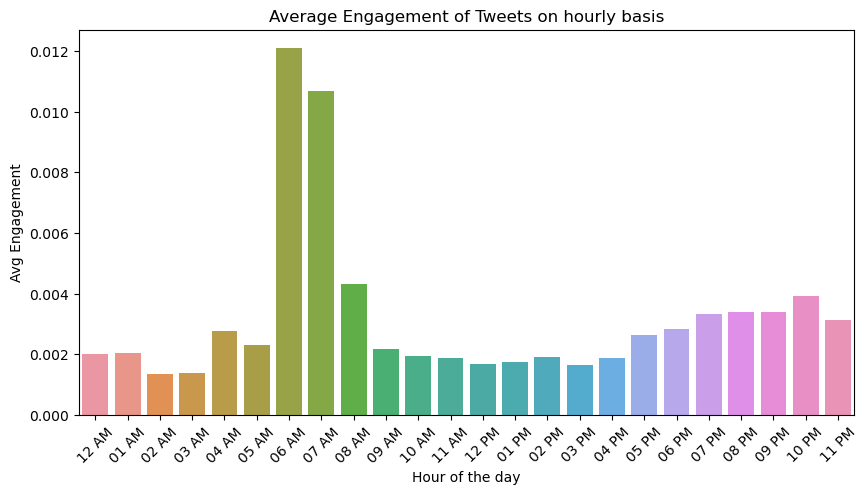

In [92]:
# Plotting a bar plot to show avg engagement based on hour of the day
plt.figure(figsize=(10,5))
ax = sns.barplot(x= hour_of_day_, y = hourly_avg_eng_)
plt.xlabel('Hour of the day')
plt.ylabel('Avg Engagement')
plt.title('Average Engagement of Tweets on hourly basis')
plt.xticks(rotation=45)
plt.show()

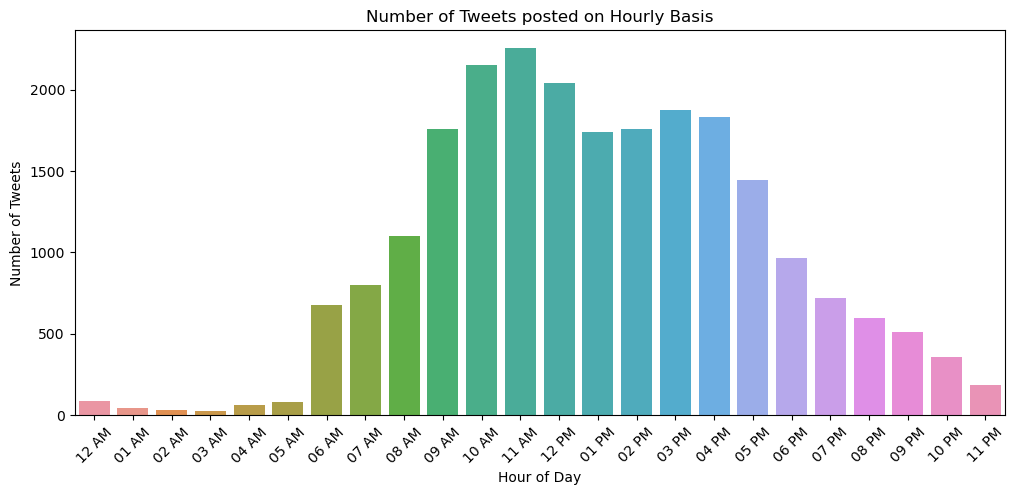

In [93]:
# Plotting a bar plot to show tweets count in each hour of the day
plt.figure(figsize=(12,5))
ax = sns.barplot(x= hour_of_day_, y = hourly_tweets_count_)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets posted on Hourly Basis')
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis

In [94]:
my_df.head()

,link,text,user_name,profile_id,date,no_comments,no_retweets,no_quotes,no_likes,account_name,...,no_of_mentions,hashtags,no_of_hashtags,emojis,no_of_emojis,unique_emojis,no_of_unq_emojis,day_of_week,time_of_day,hour
0,https://twitter.com/youtubemusic/status/178576...,just wanna say…HAPPY 6TH ANNIVERSARY #GIDLE! #...,YouTube Music,1605353990002049025,"May 1, 2024 · 8:25 PM UTC",16,474,6,1250,youtubemusic,...,0,"GIDLE , 6YearsWithGIDLE",2,none,0,none,0,Wednesday,08:25 PM,08 PM
1,https://twitter.com/youtubemusic/status/178573...,who do you hope we get an album from by the en...,YouTube Music,1605353990002049025,"May 1, 2024 · 6:00 PM UTC",292,83,54,394,youtubemusic,...,0,none,0,none,0,none,0,Wednesday,06:00 PM,06 PM
2,https://twitter.com/youtubemusic/status/178570...,cruise over to #YouTubeMusic and celebrate #AP...,YouTube Music,1605353990002049025,"May 1, 2024 · 4:32 PM UTC",5,7,0,43,youtubemusic,...,1,"YouTubeMusic , APAHM",2,none,0,none,0,Wednesday,04:32 PM,04 PM
3,https://twitter.com/youtubemusic/status/178541...,slay-ty perry,YouTube Music,1605353990002049025,"Apr 30, 2024 · 8:58 PM UTC",1,9,0,56,youtubemusic,...,0,none,0,none,0,none,0,Tuesday,08:58 PM,08 PM
4,https://twitter.com/youtubemusic/status/178538...,.@chancetherapper’s back again with those soul...,YouTube Music,1605353990002049025,"Apr 30, 2024 · 7:20 PM UTC",4,13,1,69,youtubemusic,...,1,none,0,none,0,none,0,Tuesday,07:20 PM,07 PM


In [95]:
my_df.columns

Index(['link', 'text', 'user_name', 'profile_id', 'date', 'no_comments',
       'no_retweets', 'no_quotes', 'no_likes', 'account_name', 'followers',
       'user_engagement', 'user_engagement_norm', 'no_comments_norm',
       'no_retweets_norm', 'no_quotes_norm', 'no_likes_norm', 'tweet_length',
       'mentions', 'no_of_mentions', 'hashtags', 'no_of_hashtags', 'emojis',
       'no_of_emojis', 'unique_emojis', 'no_of_unq_emojis', 'day_of_week',
       'time_of_day', 'hour'],
      dtype='object')

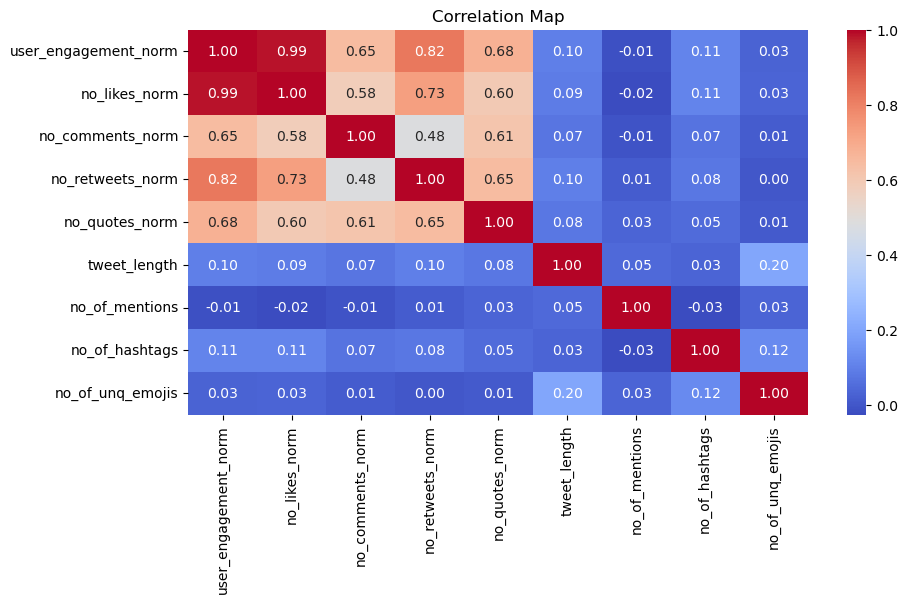

In [96]:
# Correlation plot
df_corr = my_df[['user_engagement_norm', 'no_likes_norm', 'no_comments_norm', 'no_retweets_norm', 'no_quotes_norm', 'tweet_length',
                'no_of_mentions', 'no_of_hashtags', 'no_of_unq_emojis']]
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()